In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countrybar/County_Bar.png
/kaggle/input/property-prices-california/data_preprocessed.csv
/kaggle/input/countrymap/County_Map.png


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from IPython.display import Image
import matplotlib_venn as vplt



  
**Initial data exploration and Visualization**
    
*     Numerical Data

         - No. of Bedrooms
         - No. of Bathrooms
         - Size of House
         - Lot Size - (living size + front yard, back yard)
         - Garage Spaces
         - No. of Floors


*     Categorical Data

         - Year Built
         - Address/County
         - Property Type
         
**Data processing and Feature engineering**

**Modelling**

*     Pipeline creation

         - Model creation
         - Model evaluation
         - 


*     Model Selection
*     Explainability

**Project Difficulties**

*     Scraping of data

         - Lazy loading (Not enough data points)
         - 403-ed
         - Outliers affecting the MAPE
         
**Project Extensions**

In [3]:
data = pd.read_csv('/kaggle/input/property-prices-california/data_preprocessed.csv')
data.rename(columns={"Pool Features:": "Pool"}, inplace = True)
data.head(3)

,Link,Price,Address,CA,Bedroom,Bathroom,Size,Lot,Garage Spaces,Source Property Type,Year Built,Levels or Stories,County,Pool
0,https://www.realtor.com/realestateandhomes-det...,575000,"25373 Blackthorne Dr, Murrieta, CA 92563",CA 92563,4,3.0,1870,11326,3.0,Single Family Residence,1988.0,Two,Riverside,None
1,https://www.realtor.com/realestateandhomes-det...,325000,"989 N Valley Rd, Greenville, CA 95947",CA 95947,3,1.0,1400,36590,2.0,Site Built Conventional,1963.0,1,PLUMAS,None
2,https://www.realtor.com/realestateandhomes-det...,415000,"334 Percheron Ct, San Jacinto, CA 92582",CA 92582,3,2.0,1759,9583,3.0,Single Family Residence,2006.0,One,Riverside,None


In [4]:
data['Bedroom'].replace({
    'Studio' : 1,
    'None': 0,
}, inplace = True)
data = data.astype({'Bedroom': 'int64'})

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms', ylabel='Count'>

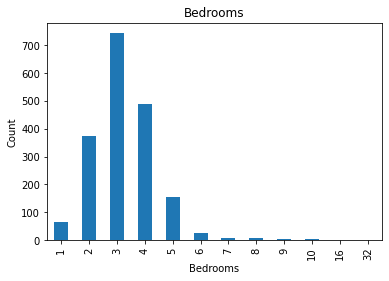

In [5]:
order_bedroom = sorted(data.Bedroom.unique())
data.Bedroom.value_counts().loc[order_bedroom].plot.bar(ylabel = 'Count', xlabel = 'Bedrooms', title = 'Bedrooms')

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms', ylabel='Count'>

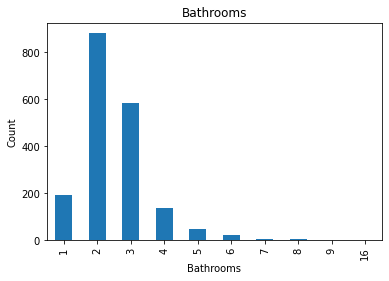

In [6]:
data['Bathroom'] = data['Bathroom'].apply(np.ceil)
data = data.astype({'Bathroom': 'int64'})
order_bathroom= sorted(data.Bathroom.unique())
data.Bathroom.value_counts().loc[order_bathroom].plot.bar(ylabel = 'Count', xlabel = 'Bathrooms', title = 'Bathrooms')

<AxesSubplot:title={'center':'Size'}, ylabel='Frequency'>

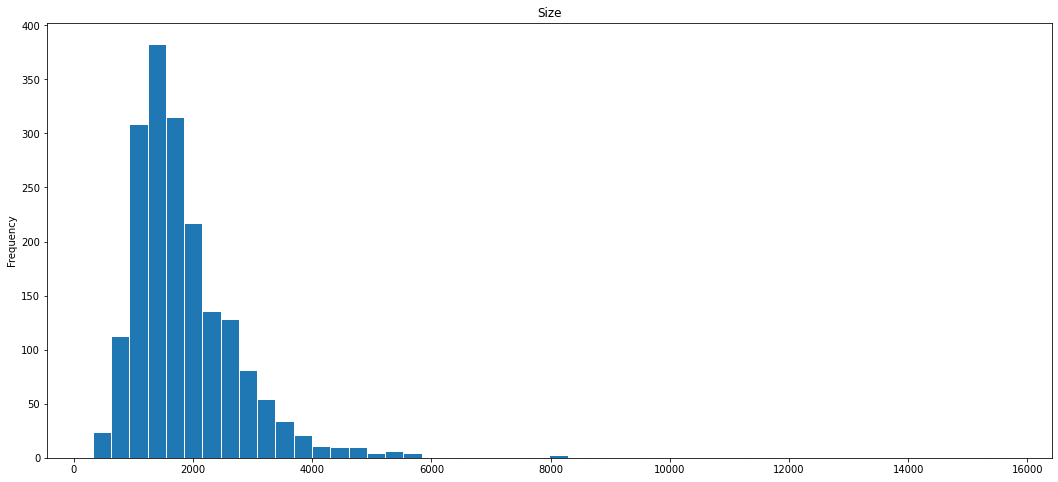

In [7]:
size_values = data['Size'].astype(int)
size_values.plot.hist(figsize = (18,8), ec = 'white', bins = 50, xlabel = 'Size(sqft)', title = 'Size')

<AxesSubplot:title={'center':'Lot Size'}, ylabel='Frequency'>

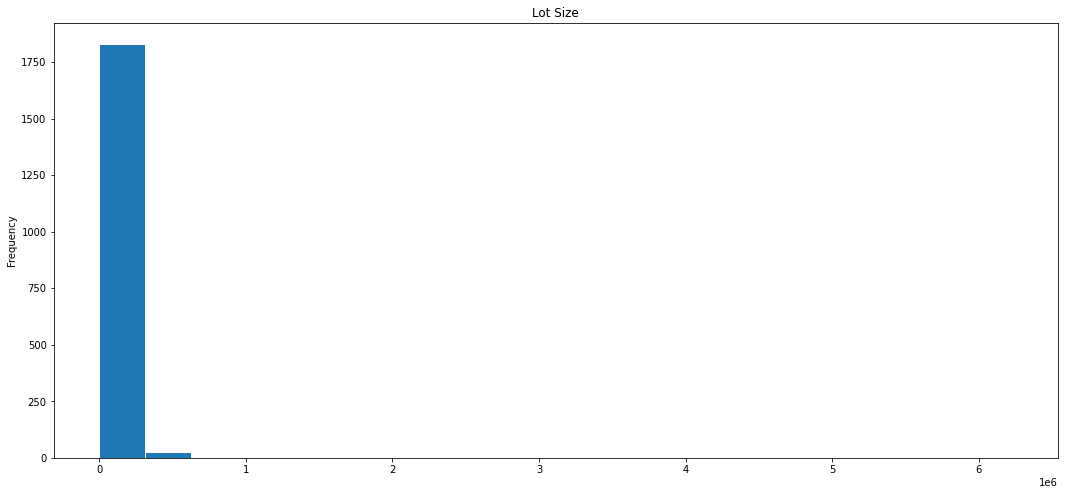

In [8]:
data['Lot'] = np.where(data['Lot'] == 'None', 0, data['Lot'])
data = data.astype({'Lot': 'int64'})
lot_values = data['Lot'].astype(int)
lot_values.plot.hist(figsize = (18,8), ec = 'white', bins = 20, title = 'Lot Size')

<AxesSubplot:title={'center':'Garage Spaces'}, xlabel='Garage Spaces', ylabel='Count'>

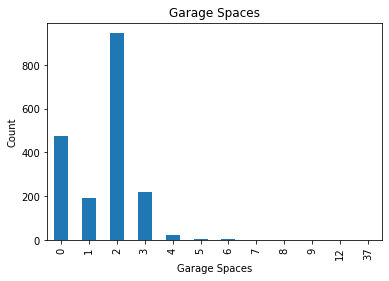

In [9]:
data['Garage Spaces'] = data['Garage Spaces'].fillna(0)
data['Garage Spaces'] = data['Garage Spaces'].apply(np.ceil)
data = data.astype({'Garage Spaces': 'int64'})
order_garage= sorted(data['Garage Spaces'].unique())
data['Garage Spaces'].value_counts().loc[order_garage].plot.bar(ylabel = 'Count', xlabel = 'Garage Spaces', title = 'Garage Spaces')

<AxesSubplot:title={'center':'Floors'}, xlabel='Floors', ylabel='Count'>

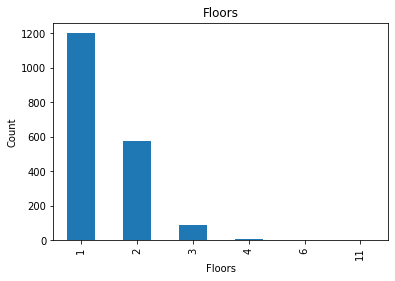

In [10]:
data['Levels or Stories'].replace({
    None : 1,
    'One': 1,
    'Two': 2,
    ' One': 1,
    ' Two': 2,
    ' Three Or More': 3,
    ' Ground Level': 1,
    ' One Story': 1,
    ' One, Two': 2,
    ' Entry Lvl(No Stairs), Single Story': 1,
    ' 1 Story': 1,
    ' Single Story': 1,
    ' Ground Level, One': 1,
    ' Multi/Split': 3,
    ' Two Story': 1,
    ' One, Split': 1,
    '18': 1,
    ' Two, Multi/Split': 2,
    ' Three Or More, Multi/Split': 3,
    ' Split, Two': 2,
    ' Ground Level, Two': 2,
    ' Three': 3,
    ' Two, Three Or More':2}, inplace = True)
data = data.astype({'Levels or Stories': 'int64'})

order_stories = sorted(data['Levels or Stories'].unique())
data['Levels or Stories'].value_counts().loc[order_stories].plot.bar(ylabel = 'Count', xlabel = 'Floors', title = 'Floors')

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

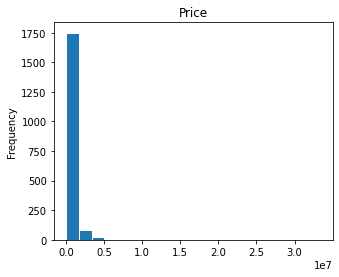

In [11]:
price_values = data['Price']
price_values.plot.hist(figsize = (5,4), ec = 'white', bins = 20, title = 'Price')

In [12]:
data[['Bedroom', 'Bathroom', 'Garage Spaces', 'Levels or Stories', 'Size', 'Lot', 'Price']].describe()

,Bedroom,Bathroom,Garage Spaces,Levels or Stories,Size,Lot,Price
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1.870000e+03,1.870000e+03
mean,3.271658,2.510695,1.586631,1.419251,1876.926203,4.152398e+04,8.263930e+05
std,1.334403,1.063849,1.414869,0.676482,1004.290603,2.766426e+05,1.154951e+06
min,1.000000,1.000000,0.000000,1.000000,320.000000,0.000000e+00,1.500000e+04
25%,3.000000,2.000000,0.000000,1.000000,1262.000000,4.162500e+03,4.300000e+05
50%,3.000000,2.000000,2.000000,1.000000,1634.000000,6.970000e+03,6.250000e+05
75%,4.000000,3.000000,2.000000,2.000000,2240.500000,1.045400e+04,8.942500e+05
max,32.000000,16.000000,37.000000,11.000000,15640.000000,6.229080e+06,3.333333e+07


<AxesSubplot:title={'center':'Floors'}, ylabel='Count'>

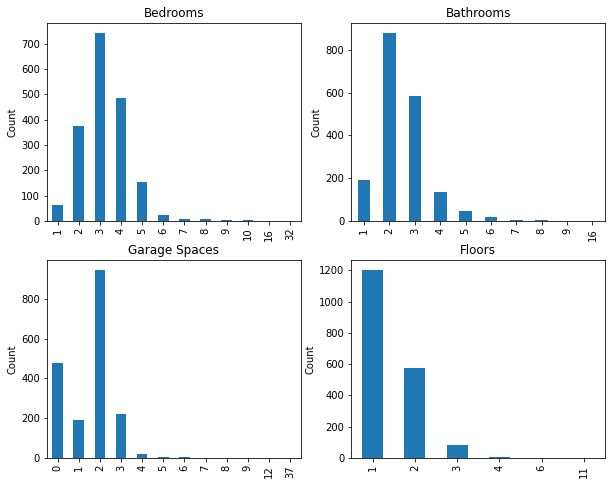

In [13]:
fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(8)

plt.axes(axs[0][0])
order_bedroom = sorted(data.Bedroom.unique())
data.Bedroom.value_counts().loc[order_bedroom].plot.bar(ylabel = 'Count', title = 'Bedrooms')
plt.axes(axs[0][1])
order_bathroom= sorted(data.Bathroom.unique())
data.Bathroom.value_counts().loc[order_bathroom].plot.bar(ylabel = 'Count', title = 'Bathrooms')
plt.axes(axs[1][0])
order_garage= sorted(data['Garage Spaces'].unique())
data['Garage Spaces'].value_counts().loc[order_garage].plot.bar(ylabel = 'Count', title = 'Garage Spaces')
plt.axes(axs[1][1])
order_stories = sorted(data['Levels or Stories'].unique())
data['Levels or Stories'].value_counts().loc[order_stories].plot.bar(ylabel = 'Count', title = 'Floors')

# data.to_csv('property_prices_preprocessed.csv', index = False)

In [14]:
data = data[data['Bedroom'] < 7]
data = data[data['Bathroom'] < 8]
data = data[data['Size'] < ((2240 - 1262) * 1.5 + 2240)]
data = data[data['Lot'] < (8005 + (8005-2996) * 1.5)]
data = data[data['Garage Spaces'] < 5]
data = data[data['Levels or Stories'] < 5]
data = data[data['Price'] < 846624 + (846624 - 429425) * 1.5]

<AxesSubplot:title={'center':'Floors'}, ylabel='Count'>

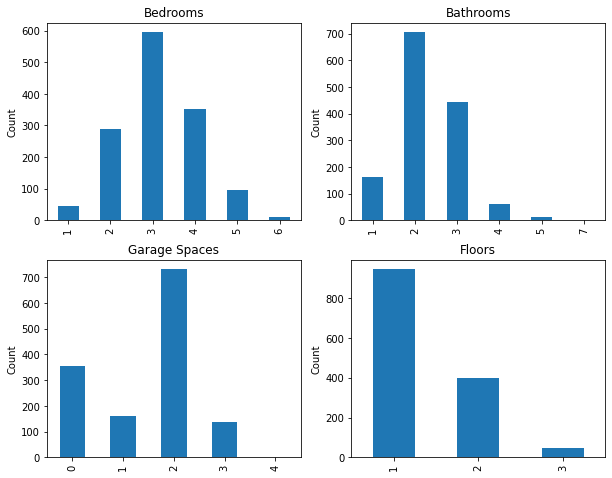

In [15]:
fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(8)

plt.axes(axs[0][0])
order_bedroom = sorted(data.Bedroom.unique())
data.Bedroom.value_counts().loc[order_bedroom].plot.bar(ylabel = 'Count', title = 'Bedrooms')
plt.axes(axs[0][1])
order_bathroom= sorted(data.Bathroom.unique())
data.Bathroom.value_counts().loc[order_bathroom].plot.bar(ylabel = 'Count', title = 'Bathrooms')
plt.axes(axs[1][0])
order_garage= sorted(data['Garage Spaces'].unique())
data['Garage Spaces'].value_counts().loc[order_garage].plot.bar(ylabel = 'Count', title = 'Garage Spaces')
plt.axes(axs[1][1])
order_stories = sorted(data['Levels or Stories'].unique())
data['Levels or Stories'].value_counts().loc[order_stories].plot.bar(ylabel = 'Count', title = 'Floors')

# data.to_csv('property_prices_preprocessed.csv', index = False)

<AxesSubplot:title={'center':'Size'}, ylabel='Frequency'>

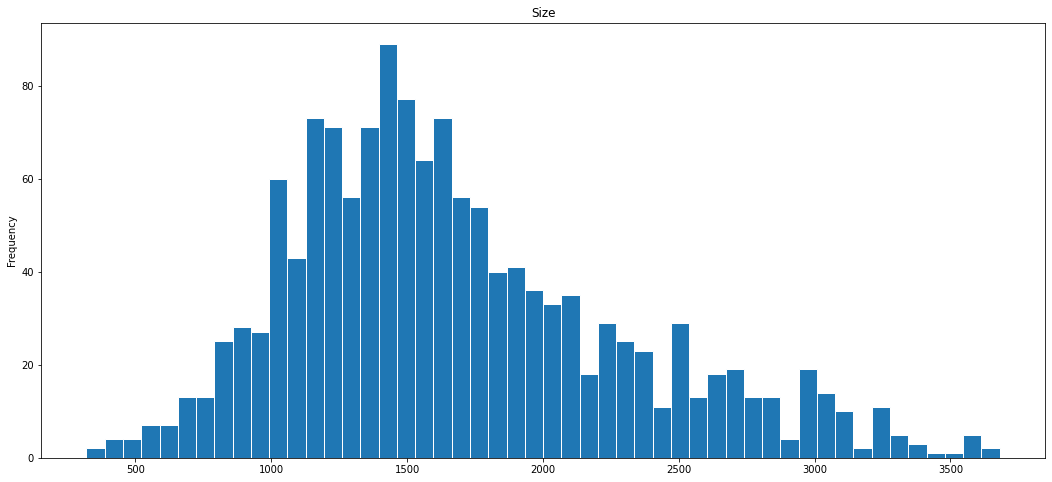

In [16]:
size_values = data['Size'].astype(int)
size_values.plot.hist(figsize = (18,8), ec = 'white', bins = 50, title = 'Size')

<AxesSubplot:title={'center':'Lot Size'}, ylabel='Frequency'>

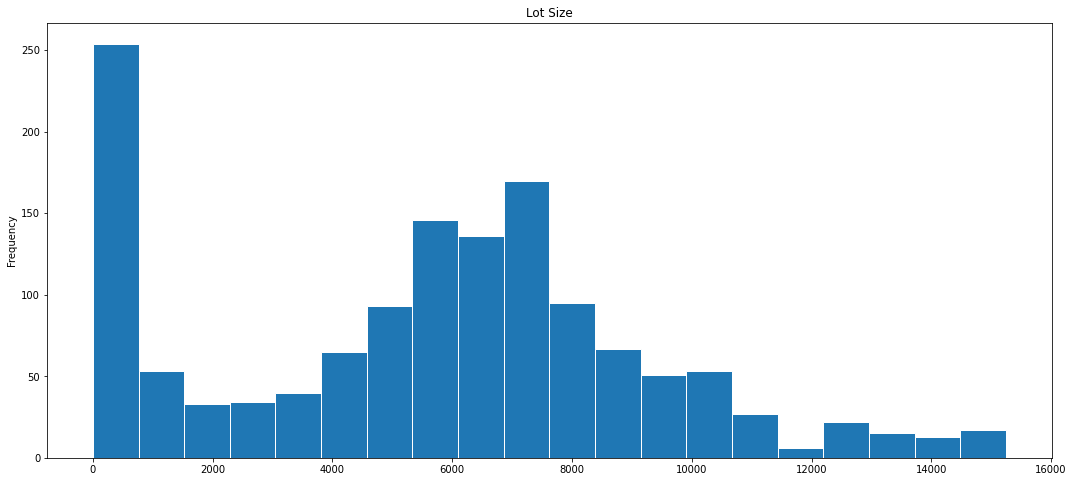

In [17]:
lot_values = data['Lot'].astype(int)
lot_values.plot.hist(figsize = (18,8), ec = 'white', bins = 20, title = 'Lot Size')

**Now we take a look at prices**

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

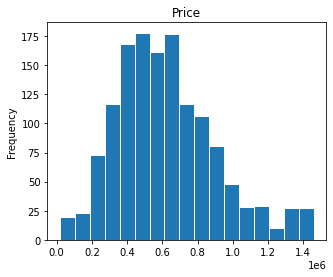

In [18]:
price_values = data['Price']
price_values.plot.hist(figsize = (5,4), ec = 'white', bins = 17, title = 'Price')

In [19]:
data.columns

Index(['Link', 'Price', 'Address', 'CA', 'Bedroom', 'Bathroom', 'Size', 'Lot',
       'Garage Spaces', 'Source Property Type', 'Year Built',
       'Levels or Stories', 'County', 'Pool'],
      dtype='object')

In [20]:
#sns.pairplot(data)

In [21]:
# data.to_csv('property_prices_preprocessed.csv', index = False)

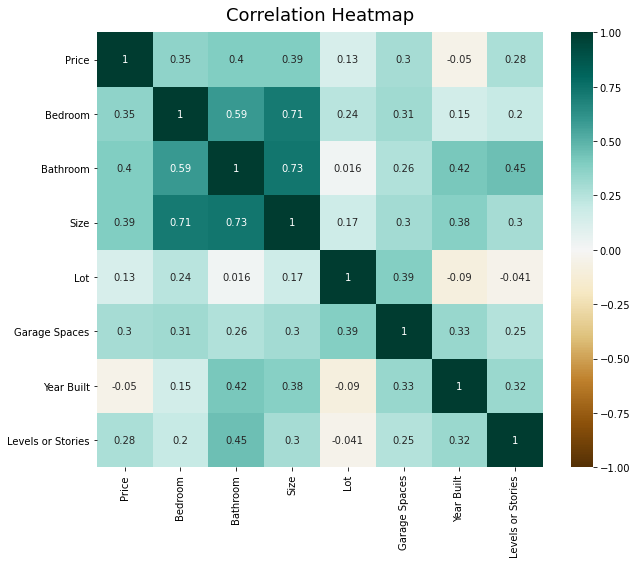

In [22]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

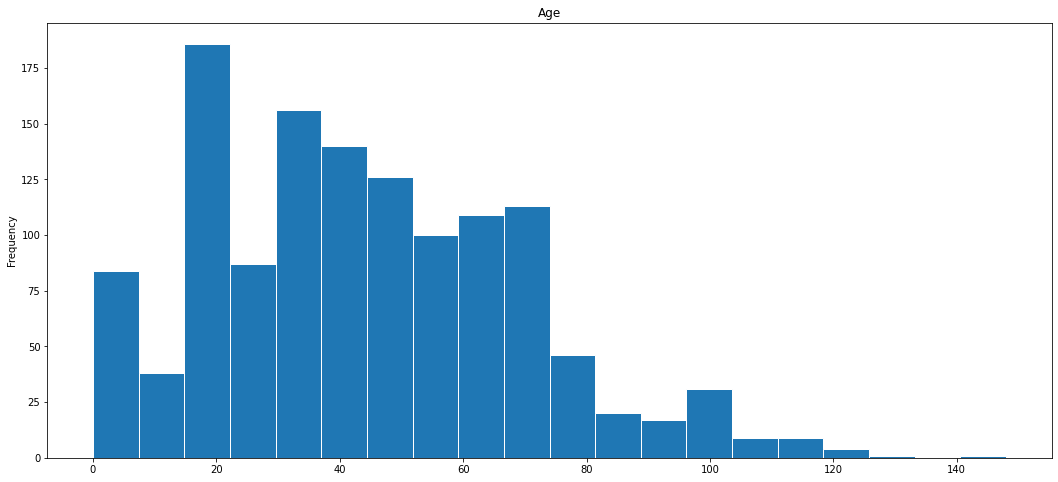

In [23]:
data['Age'] = 2022 - data['Year Built']

age_values = data['Age']
age_values.plot.hist(figsize = (18,8), ec = 'white', bins = 20, title = 'Age')

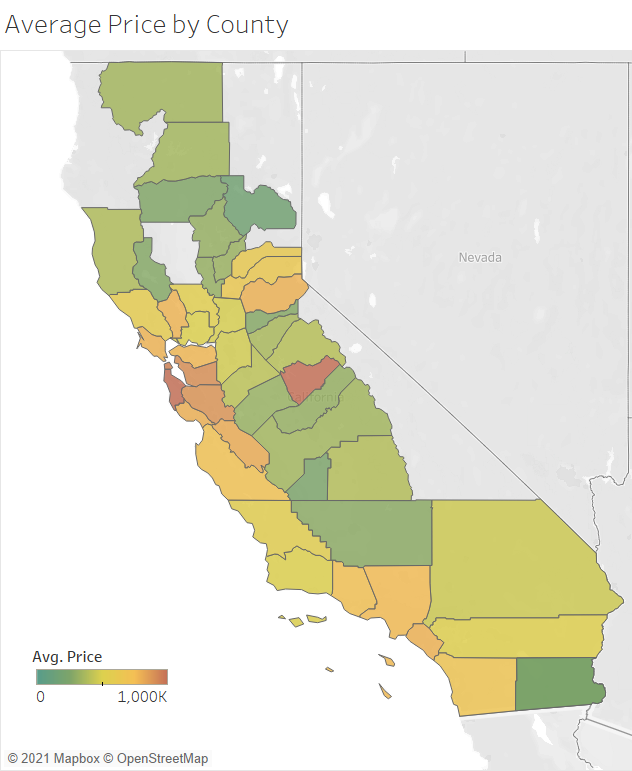

In [24]:
Image("../input/countrymap/County_Map.png")

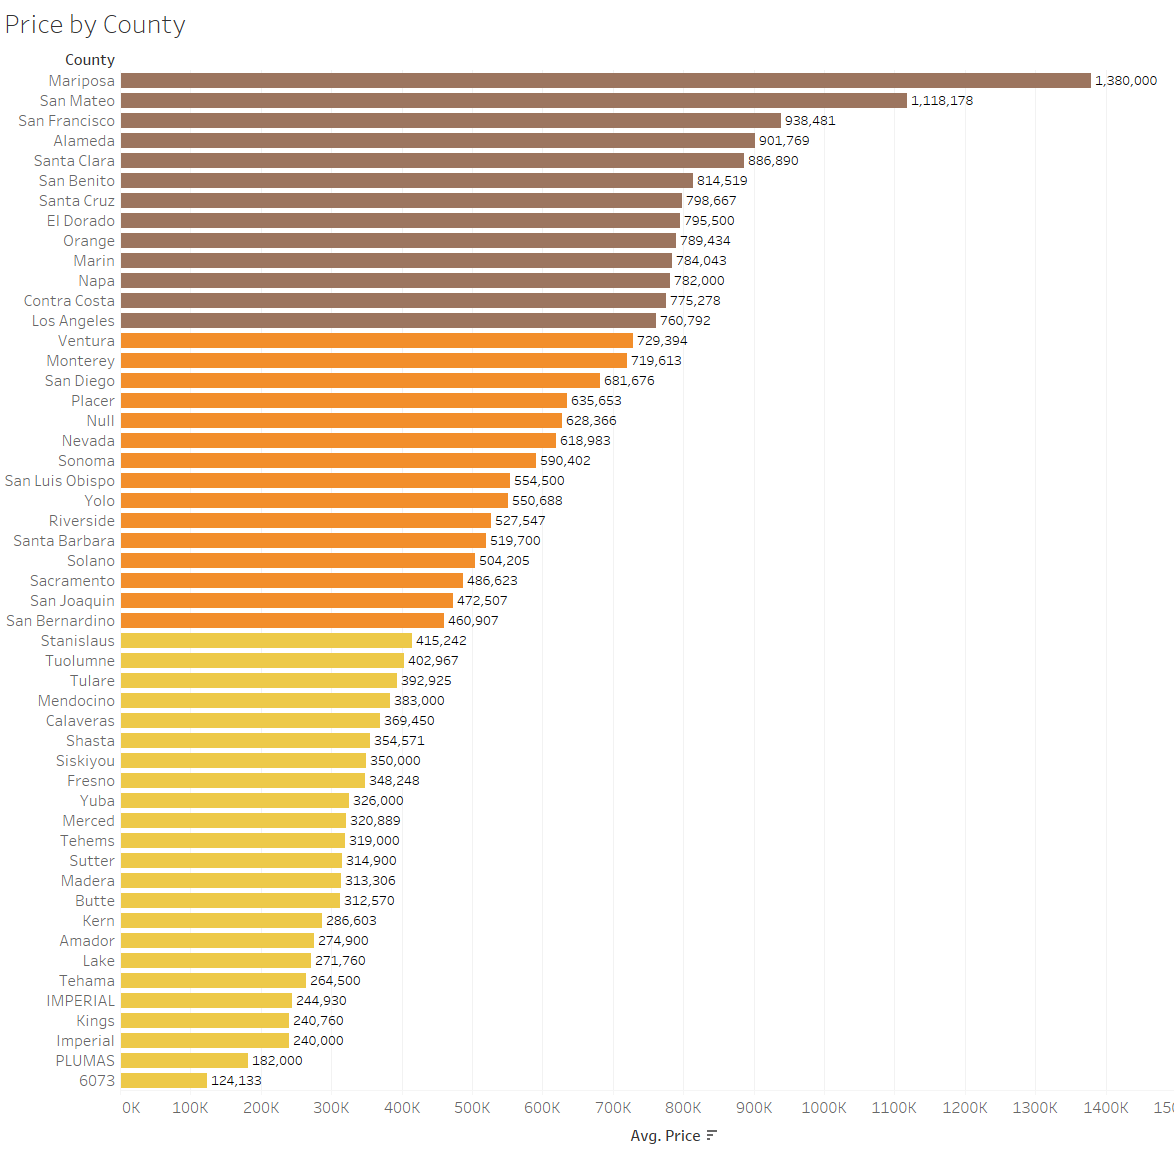

In [25]:
Image("../input/countrybar/County_Bar.png")

# **Feature Engineering and Data Preparation for Model Building**

In [26]:
data['Age'] = data['Age'].fillna((data['Age'].mean()))

In [27]:
data['County'] = data['County'].str.lstrip()

upper_price_range = ['Los Angeles', 'Napa', 'Orange', 'Santa Clara', 'Alameda', 'San Francisco', 'San Mateo', 'Contra Costa', 'Marin', 'El Dorado', 'Santa Cruz', 'San Benito', 'Mariposa']
middle_price_range = ['Santa Barbara', 'San Diego', 'San Bernardino', 'San Joaquin', 'Sacramento', 'Solano', 'Riverside', 'Yolo', 'San Luis Obispo', 'Sonoma', 'Nevada', 'Placer', 'Monterey', 'Ventura', None]
lower_price_range = ['6073', 'PLUMAS', 'Imperial', 'Kings', 'IMPERIAL', 'Tehama', 'Lake', 'Kern', 'Butte', 'Madera', 'Sutter', 'Tehems', 'Merced', 'Yuba', 'Fresno', 'Siskiyou', 'Shasta', 'Mendocino', 'Tulare', 'Tuolumne', 'Stanislaus', 'Amador', 'Calaveras']

data.loc[data['County'].isin(upper_price_range), 'Upper_Price_Bracket'] = 1
data.loc[data['County'].isin(middle_price_range), 'Middle_Price_Bracket'] = 1
data.loc[data['County'].isin(lower_price_range), 'Lower_Price_Bracket'] = 1

data['Middle_Price_Bracket'] = np.where(data['County'].isnull(), 1, data['Middle_Price_Bracket'])
data[['Upper_Price_Bracket', 'Middle_Price_Bracket', 'Lower_Price_Bracket']] = data[['Upper_Price_Bracket', 'Middle_Price_Bracket', 'Lower_Price_Bracket']].fillna(value=0)

In [28]:
# data.Pool.unique()

In [29]:
# data['Source Property Type'].unique()

In [30]:
data['Pool'] = np.where(data['Pool'].str.contains('Community'), 'Community', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Association'), 'Community', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Common'), 'Community', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('In Ground'), 'Private', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Inground'), 'Private', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Built-In'), 'Private', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Below Ground'), 'Private', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Waterfall'), 'Private', data['Pool'])
data['Pool'] = np.where(data['Pool'].str.contains('Infinity Pool'), 'Private', data['Pool'])
data['Pool'] = np.where(~data['Pool'].isin(['None', 'Community', 'Private']), 'Above Ground', data['Pool'])

In [31]:
data['Source Property Type'] = data['Source Property Type'].str.lstrip()
data['Source Property Type'] = np.where(data['Source Property Type'].str.contains('Single Family'), 'Detached', data['Source Property Type'])
data['Source Property Type'] = np.where(data['Source Property Type'].str.contains('SFD'), 'Detached', data['Source Property Type'])
data['Source Property Type'] = np.where(data['Source Property Type'].str.contains('Condo'), 'Condominium', data['Source Property Type'])

condo = ['Timeshare', 'Stock Cooperative', 'PUD', 'Custom', 'Loft']

detached = ['Site Built Conventional', 'Residential', 'RESIDENTIAL INCOME', 'Res Income 2-4 Units', 'Home/Estate', 'Tract', 'Residential Income', 'Commercial/Residential', 'Apartment', 'Timeshare']

mobile_manufactured = ['Double Wide', 'Mobile Home', 'Manufactured Home', 'Mobile', 'Manufactured In Park', 'Manufactured On Land', 'Triple Wide Mobile Home', 'Single Wide', 'Single Wide Mobile Home', 'Manufactured', 'MH in a Park', 'Manuf/Mobl Real Prop', 'Double Wide Mobile Home', 'Mobile Land', 'MFD-F']

attached = ['Multi-Family', '2 Houses on Lot', 'Quadruplex', 'Townhouse', 'Halfplex', 'Triple Wide', 'Duplex', 'Share Ownership', 'All Other Attached', 'Townhome', 'Triplex', 'Duet']

data.drop(data[data['Source Property Type'] == 'Dock'].index, inplace=True)

data['Source Property Type'] = np.where(data['Source Property Type'].isin(condo), 'Condominium', data['Source Property Type'])
data['Source Property Type'] = np.where(data['Source Property Type'].isin(detached), 'Detached', data['Source Property Type'])
data['Source Property Type'] = np.where(data['Source Property Type'].isin(attached), 'Attached', data['Source Property Type'])
data['Source Property Type'] = np.where(data['Source Property Type'].isin(mobile_manufactured), 'Mobile/Manufactured', data['Source Property Type'])

In [32]:
data['Source Property Type'].value_counts()

Detached               1105
Condominium             141
Attached                 89
Mobile/Manufactured      55
Name: Source Property Type, dtype: int64

In [33]:
data.Pool.value_counts()

None            1014
Community        232
Private          100
Above Ground      44
Name: Pool, dtype: int64

In [34]:
# data['No_Lot'] = np.where(data['Lot'] <= data['Size'], 1, 0)
# data['Good_Lot'] = np.where(data['Lot'] >= data['Size'] + 21780, 1, 0)

def label_lot(row):
    if row['Lot'] <= row['Size']:
        return 'No_lot'
    if row['Lot'] >= row['Size'] + 21780:
        return 'Good_lot'
    if (row['Lot'] > row['Size']) and (row['Lot'] < (row['Size'] + 21780)):
        return 'Normal_lot'
data['lot_to_size'] = data.apply(lambda row: label_lot(row), axis=1)

In [35]:
data_drop = data[data['Price'] > 100000]

In [36]:
X = pd.get_dummies(data_drop[['Bedroom', 'Bathroom', 'Size', 'lot_to_size', 'Garage Spaces', 'Levels or Stories', 'Pool', 'Age', 'Upper_Price_Bracket', 'Middle_Price_Bracket', 'Lower_Price_Bracket']])
y = data_drop['Price']

# **Modelling** # 

**Pipeline Creation**

* Regression Model: [LinearRegression, LogisticRegression, LGBMRegressor, XGBRegressor, SGDRegressor, KernelRidge, ElasticNet, BayesianRidge, GradientBoostingRegressor, SVR]
* Evaluation Metric: MAPE (Mean Average Percentage Error)/ MAE (Mean Average Error) / MSE (Mean Squared Error)


In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [38]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def pipeline(model, evaluation, scaler, X, y, test_size = 0.2, random_seed = 42):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=random_seed)
    
    
    dispatcher_eval = {'mae': lambda y_true, y_pred: mean_absolute_error(y_true,y_pred),
                       'mse': lambda y_true, y_pred: mean_squared_error(y_true,y_pred),
                       'rmse': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
                       'mape': lambda y_true, y_pred: mape(y_true, y_pred)}
    
    
    dispatcher_scaler = {'standard': StandardScaler(),
                         'minmax': MinMaxScaler(),
                         'maxabs': MaxAbsScaler()}
    
    if scaler == None:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        eval_score = dispatcher_eval[evaluation](y_test,prediction)
        print(evaluation, ':', eval_score)
    
    else:
        model_scaler = dispatcher_scaler[scaler]
        X_train_Scaled = model_scaler.fit_transform(X_train)
        X_test_Scaled = model_scaler.transform(X_test)
        model.fit(X_train_Scaled, y_train)
        prediction = model.predict(X_test_Scaled)
        eval_score = dispatcher_eval[evaluation](y_test,prediction)
        print(evaluation, ':', eval_score)

In [39]:
models_dict = {'LinearRegression': LinearRegression(),
               'LogisticRegression': LogisticRegression(),
               'RandomForestRegressor': RandomForestRegressor(),
               'LGBMRegressor': LGBMRegressor(),
               'XGBRegressor': XGBRegressor()}
models_dict_2 = {'LinearRegression': LinearRegression(),
                 'LogisticRegression': LogisticRegression(solver='liblinear'),
                 'RandomForestRegressor': RandomForestRegressor(),
                 'LGBMRegressor': LGBMRegressor(),
                 'XGBRegressor': XGBRegressor(),
                 'SGDRegressor': SGDRegressor(),
                 'KernelRidge': KernelRidge(),
                 'ElasticNet': ElasticNet(),
                 'BayesianRidge': BayesianRidge(),
                 'GradientBoostingRegressor': GradientBoostingRegressor(),
                 'SVR': SVR()}

In [40]:
for key in models_dict_2:
    print(key)
    pipeline(models_dict_2[key], 'mape', None, X, y)
    print('------------------')

LinearRegression
mape : 23.63788842754964
------------------
LogisticRegression
mape : 35.711791248117954
------------------
RandomForestRegressor
mape : 24.958275010354548
------------------
LGBMRegressor
mape : 26.60641697881322
------------------
XGBRegressor
mape : 27.56691289768371
------------------
SGDRegressor
mape : 30943986828.595577
------------------
KernelRidge
mape : 23.62839994581286
------------------
ElasticNet
mape : 29.748672294489403
------------------
BayesianRidge
mape : 23.598907140029844
------------------
GradientBoostingRegressor
mape : 24.168800740470296
------------------
SVR
mape : 40.96818028408924
------------------


In [41]:
for key in models_dict:
    print(key)
    pipeline(models_dict[key], 'mape', 'standard', X, y)
    print('------------------')

LinearRegression
mape : 23.637888427549647
------------------
LogisticRegression
mape : 31.948745932526307
------------------
RandomForestRegressor
mape : 24.605560297980432
------------------
LGBMRegressor
mape : 26.35920516001477
------------------
XGBRegressor
mape : 27.51603564732156
------------------


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

model_of_choice = LinearRegression()
# model_of_choice.fit(X_train_Scaled, y_train)
model_of_choice.fit(X_train, y_train)
# prediction_of_choice = model_of_choice.predict(X_test_Scaled)
prediction_of_choice = model_of_choice.predict(X_test)
# print(mape(y_test, prediction_of_choice))

coef_dict = {}
for i in range(len(model_of_choice.coef_)):
    coef_dict[X.columns[i]] = model_of_choice.coef_[i]

    
print('Beta Coefficients for Linear Regression')
print('________________________________________')

for key in coef_dict:
    print("%-30s %4f" % (key, coef_dict[key]))
#    print(key, ':', coef_dict[key])

Beta Coefficients for Linear Regression
________________________________________
Bedroom                        -8737.006389
Bathroom                       73421.974949
Size                           130.966952
Garage Spaces                  29454.301476
Levels or Stories              35991.299359
Age                            2009.694588
Upper_Price_Bracket            215096.114354
Middle_Price_Bracket           -14597.112104
Lower_Price_Bracket            -200499.002250
lot_to_size_No_lot             -8662.168133
lot_to_size_Normal_lot         8662.168133
Pool_Above Ground              11395.998631
Pool_Community                 -72078.017825
Pool_None                      -16492.740324
Pool_Private                   77174.759519
